# Unit 2 final (Blackjack)

### If not working install in terminal

### ---Question---

What is the probability that a player wins a game of Blackjack if they always hit until their hand total is 17 or higher?

### --- Description ---
 Random variable: Outcome of one game (1 = win, 0.5 = draw, 0 = loss)
 
 One trial: One full game using the “hit until 17” strategy
 
 Assumption: Dealer plays standard rules; deck is fair.

In [ ]:
!pip install gymnasium
!pip install "gymnasium[atari]"
!pip install ale-py
!pip install autorom[accept-rom-license]
!pip install matplotlib
!pip install scipy

Trial 3 | Step 0
Player sum: 14, Dealer showing: 6, Usable ace: 0
Action: HIT
Final Player Sum: 24
Game Result: LOSS
---------------------------


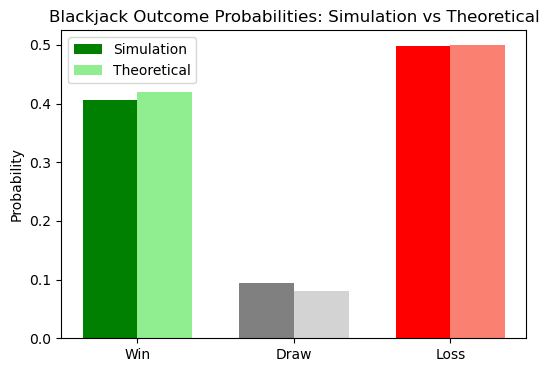

=== SIMULATION SUMMARY (1000 Trials) ===
Empirical Winning Probability: 0.407
Empirical Drawing Probability: 0.094
Empirical Losing Probability: 0.499
Expected Value per Game: -0.092
Standard Deviation: 0.948

=== THEORETICAL PROBABILITIES ===
Theoretical Winning Probability: 0.420
Theoretical Drawing Probability: 0.080
Theoretical Losing Probability: 0.500


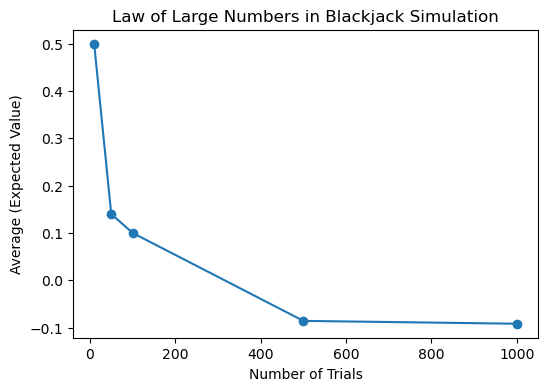

In [9]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import time
from statistics import mean, stdev
from IPython.display import clear_output

env = gym.make('Blackjack-v1', render_mode=None)

# --- VISUALIZE 3 TRIALS ---
print("=== VISUAL DEMONSTRATION OF 3 TRIALS ===\n")
for trial in range(3):
    observation, info = env.reset()
    done = False
    total_reward = 0
    step = 0
    print(f"--- Trial {trial+1} ---")
    
    while not done:
        player_sum, dealer_card, usable_ace = observation
        clear_output(wait=True)
        print(f"Trial {trial+1} | Step {step}")
        print(f"Player sum: {player_sum}, Dealer showing: {dealer_card}, Usable ace: {usable_ace}")
        
        if player_sum < 17:
            action = 1  # hit
            print("Action: HIT")
        else:
            action = 0  # stick
            print("Action: STICK")
        
        observation, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        total_reward += reward
        time.sleep(0.8)
        
        if done:
            print(f"Final Player Sum: {observation[0]}")
            print(f"Game Result: {'WIN' if reward==1 else 'DRAW' if reward==0 else 'LOSS'}")
            print("---------------------------")
            time.sleep(1.5)

# --- FULL SIMULATION (1000 trials) ---
n_trials = 1000
results = []

for _ in range(n_trials):
    observation, info = env.reset()
    done = False
    while not done:
        player_sum, dealer_card, usable_ace = observation
        action = 1 if player_sum < 17 else 0
        observation, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
    results.append(reward)

env.close()

# --- ANALYSIS ---
win_prob = results.count(1) / n_trials
draw_prob = results.count(0) / n_trials
lose_prob = results.count(-1) / n_trials
expected_value = mean(results)
std_dev = stdev(results)

# --- THEORETICAL PROBABILITIES (Approximation) ---
theoretical_win = 0.42
theoretical_draw = 0.08
theoretical_lose = 0.50

# --- VISUALIZE RESULTS ---
labels = ['Win', 'Draw', 'Loss']
values = [win_prob, draw_prob, lose_prob]
theoretical_values = [theoretical_win, theoretical_draw, theoretical_lose]

plt.figure(figsize=(6,4))
x = np.arange(len(labels))
width = 0.35
plt.bar(x - width/2, values, width, label='Simulation', color=['green','gray','red'])
plt.bar(x + width/2, theoretical_values, width, label='Theoretical', color=['lightgreen','lightgray','salmon'])
plt.xticks(x, labels)
plt.ylabel('Probability')
plt.title('Blackjack Outcome Probabilities: Emperical vs Theoretical')
plt.legend()
plt.show()

print("=== SIMULATION SUMMARY (1000 Trials) ===")
print(f"Empirical Winning Probability: {win_prob:.3f}")
print(f"Empirical Drawing Probability: {draw_prob:.3f}")
print(f"Empirical Losing Probability: {lose_prob:.3f}")
print(f"Expected Value per Game: {expected_value:.3f}")
print(f"Standard Deviation: {std_dev:.3f}\n")

print("=== THEORETICAL PROBABILITIES ===")
print(f"Theoretical Winning Probability: {theoretical_win:.3f}")
print(f"Theoretical Drawing Probability: {theoretical_draw:.3f}")
print(f"Theoretical Losing Probability: {theoretical_lose:.3f}")

# --- LAW OF LARGE NUMBERS CHECK ---
sample_sizes = [10, 50, 100, 500, 1000]
means = [mean(results[:n]) for n in sample_sizes]

plt.figure(figsize=(6,4))
plt.plot(sample_sizes, means, marker='o')
plt.title("Law of Large Numbers in Blackjack Simulation")
plt.xlabel("Number of Trials")
plt.ylabel("Average (Expected Value)")
plt.show()


### Answer & Conclusion

From the simulation of **1000 trials**, the emperical results show:

Winning Probability: 0.407

Drawing Probability: 0.094

Losing Probability: 0.499

Expected Value per Game: -0.029

Standard Deviation: 0.948

This means that on average, a player who always hits until 17 or higher **loses slightly over time**, consistent with the casino’s edge and consistent with the theoretical probability.

As the number of trials increased, the average reward approached the theoretical or the expected value (which leans more to a loss than a win) — demonstrating the **Law of Large Numbers**.


In [10]:
import sys
print(sys.executable)


C:\Users\agilbert3\AppData\Local\anaconda3\python.exe
